In [1]:
"""import json
with open("./data/annotations/person_keypoints_train2017.json") as file:
    dataset = json.load(file)
display(dataset.keys())
display(dataset['annotations'][0])"""

'import json\nwith open("./data/annotations/person_keypoints_train2017.json") as file:\n    dataset = json.load(file)\ndisplay(dataset.keys())\ndisplay(dataset[\'annotations\'][0])'

In [2]:
"""import json
with open("./data/annotations/person_keypoints_train2017.json") as file:
    dataset = json.load(file)
display(dataset.keys())
display(dataset['annotations'][0]["keypoints"])"""
%load_ext autoreload

%autoreload 2


In [3]:
class Arg:
    def __init__(self):
        self.data_path = "./data/annotations/person_keypoints_train2017.json"
        self.image_token_len = 10
        self.image_folder = "./data/train2017"
        self.image_size = 224
        self.crop_size = 224
        self.data_augmentation = False
        self.conv_format = "keypoint"
        self.num_format = "random"
data_args = Arg()

In [4]:
import transformers 
tokenizer = transformers.AutoTokenizer.from_pretrained("./pretrain")
tokenizer.pad_token = "<pad>"

C:\Users\86147\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from utils.train2d import make_supervised_data_module
args = make_supervised_data_module(tokenizer,data_args)

xFormers not available
xFormers not available


loading annotations into memory...
Done (t=7.17s)
creating index...
index created!


Use Conv Format  keypoint


In [6]:
display(args.keys())
dataset = args["train_dataset"]
import random

dict_keys(['train_dataset', 'eval_dataset', 'data_collator'])

In [7]:

import matplotlib.pyplot as plt
import torch
def show_img(image):
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])
    _image = image * std.view(-1, 1, 1) + mean.view(-1, 1, 1)
    img = _image.permute(1, 2, 0).numpy() 
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

<s> Image: <im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch

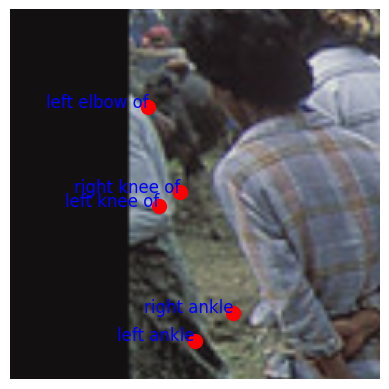

In [20]:
def show_coordinate(instance):
    image = instance["image"]
    input_ids = instance["input_ids"]
    decoded_str = tokenizer.decode(input_ids)
    print(decoded_str)
    indices = torch.where(input_ids == tokenizer.get_vocab()["Question"])[0]
    key_points = []
    for i in indices:
        key_points.append(tokenizer.decode(input_ids[i+5 : i+9]))
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])
    _image = image * std.view(-1, 1, 1) + mean.view(-1, 1, 1)
    img = _image.permute(1, 2, 0).numpy() 
    plt.imshow(img)

    pattern = r'\[\s*0\.\d{3}\s*,\s*0\.\d{3}\s*\]'
    import re
    matches = re.findall(pattern, decoded_str)
    print(matches)
    for i,s in enumerate(matches):
        x = float(s[1:6]) * image.shape[1]
        y = float(s[7:12]) * image.shape[2]
        plt.scatter(x, y, color='red', label="散点", s=100)  
        plt.text(x, y, str(key_points[i]), fontsize=12, ha='right', color='blue')
    plt.axis('off')  
    plt.show()
show_coordinate(dataset[5])

In [9]:
from utils.valid2d import DataCollatorForSupervisedDataset
collate_fn=DataCollatorForSupervisedDataset(10, data_args.conv_format)

In [10]:
display(dataset._parse_data_item_val(6))

{'images': tensor([[[-1.7923, -1.7923, -1.7923,  ..., -1.0185, -1.0623, -1.0331],
          [-1.7923, -1.7923, -1.7923,  ..., -1.0331, -1.0477, -0.9893],
          [-1.7923, -1.7923, -1.7923,  ..., -1.0331, -1.0477, -1.0039],
          ...,
          [-1.7923, -1.7923, -1.7923,  ..., -0.5222, -0.5806, -0.5806],
          [-1.7923, -1.7923, -1.7923,  ..., -0.5076, -0.5952, -0.6536],
          [-1.7923, -1.7923, -1.7923,  ..., -0.6536, -0.6974, -0.6536]],
 
         [[-1.7521, -1.7521, -1.7521,  ..., -0.9417, -1.0017, -0.9567],
          [-1.7521, -1.7521, -1.7521,  ..., -0.9567, -0.9867, -0.9267],
          [-1.7521, -1.7521, -1.7521,  ..., -0.9717, -0.9867, -0.9417],
          ...,
          [-1.7521, -1.7521, -1.7521,  ..., -0.7166, -0.7316, -0.7616],
          [-1.7521, -1.7521, -1.7521,  ..., -0.7316, -0.8216, -0.8967],
          [-1.7521, -1.7521, -1.7521,  ..., -0.9267, -0.9567, -0.9117]],
 
         [[-1.4802, -1.4802, -1.4802,  ..., -0.7834, -0.7977, -0.7834],
          [-1.4802

In [11]:
result = dataset._parse_data_item_val(6)
print(result.keys())
result_dicts, batch_prompts, batch_images, batch_has_images = collate_fn( [ result ] )
display(result_dicts[0])

dict_keys(['images', 'image_id', 'c', 's', 'joints', 'joints_vis'])


{'initial_prompt': 'Image: <im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch><im_patch>\nKeypoint: The right ankle is the joint connecting the right lower leg and the right foot, typically located at the base of the right leg.\nQuestion: Where is the right ankle of this person in this image? Please provide its coordinates.\nAnswer:',
 'image_id': 318219,
 'c': array([249.34, 338.9 ], dtype=float32),
 's': array([3.001, 3.001], dtype=float32)}

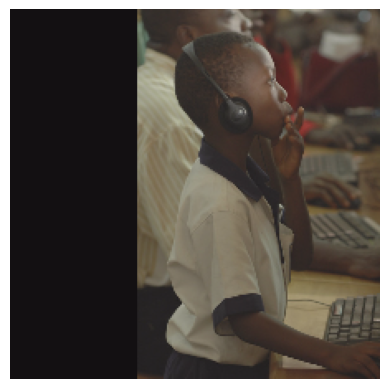

{'images': tensor([[[-1.7923, -1.7923, -1.7923,  ..., -0.7704, -0.8580, -1.0331],
          [-1.7923, -1.7923, -1.7923,  ..., -0.6682, -0.7996, -0.9602],
          [-1.7923, -1.7923, -1.7923,  ..., -0.5806, -0.6682, -0.8726],
          ...,
          [-1.7923, -1.7923, -1.7923,  ..., -1.1061, -0.9602, -1.0477],
          [-1.7923, -1.7923, -1.7923,  ..., -1.2521, -1.0331, -1.1061],
          [-1.7923, -1.7923, -1.7923,  ..., -1.4419, -1.1061, -1.0185]],
 
         [[-1.7521, -1.7521, -1.7521,  ..., -0.8816, -0.9267, -1.0617],
          [-1.7521, -1.7521, -1.7521,  ..., -0.7766, -0.8666, -0.9717],
          [-1.7521, -1.7521, -1.7521,  ..., -0.6865, -0.7766, -0.9117],
          ...,
          [-1.7521, -1.7521, -1.7521,  ..., -1.3019, -1.2268, -1.2568],
          [-1.7521, -1.7521, -1.7521,  ..., -1.3619, -1.2718, -1.3019],
          [-1.7521, -1.7521, -1.7521,  ..., -1.4369, -1.3169, -1.3019]],
 
         [[-1.4802, -1.4802, -1.4802,  ..., -0.8545, -0.8545, -0.9683],
          [-1.4802

[[165.31793   49.750145   0.      ]
 [  0.         0.         0.      ]
 [157.50005   43.70906    0.      ]
 [  0.         0.         0.      ]
 [132.98035   58.27874    0.      ]
 [137.95535  104.11994    0.      ]
 [125.51782  117.978905   0.      ]
 [174.9126   151.73793    0.      ]
 [142.93037  188.69518    0.      ]
 [168.51616  105.89673    0.      ]
 [193.03586  207.8845     0.      ]
 [139.37679  217.47917    0.      ]
 [129.42676  216.76846    0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]]


In [12]:
result = dataset._parse_data_item_val(7)
show_img(result["images"])
display(result)
print(result["joints"])


In [13]:
import random
def get_coordinate(x,y,num_conv):    
    if num_conv == "normal":
        return "[{:.3f},{:.3f}]".format(x, y)
    if num_conv == "round":
        return "[{:.1f},{:.1f}][{:.2f},{:.2f}][{:.3f},{:.3f}]".format(x, y,x,y,x,y)
    if num_conv == "random":
        int_x , int_y = int(x*1000) , int(y*1000)
        x_1,y_1 = int_x // 100 + (random.random()<(int_x%100) / 100) , int_y // 100 + (random.random()<(int_y%100) / 100)
        x_2,y_2 = ( int_x // 10 ) + (random.random()<(int_x%10) / 10) ,( int_y // 10 ) + (random.random()<(int_y%10)/10)
        return "[{:.1f},{:.1f}][{:.2f},{:.2f}][{:.3f},{:.3f}]".format(x_1/10, y_1/10 , x_2/100 , y_2 / 100 , x,y )

In [14]:
def show():
    x , y = random.random() , random.random()
    for conv in ["normal" , "round" , "random"]:
        print(get_coordinate(x,y,conv))
show()

[0.775,0.079]
[0.8,0.1][0.77,0.08][0.775,0.079]
[0.7,0.1][0.77,0.08][0.775,0.079]


In [15]:
len("[0.807,0.112]")

13